In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from matplotlib import animation, rc
from IPython.display import HTML, display
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.2)

#### Auxiliar function for building animation for velocity and trajectory

In [3]:
def animate(i,vF,x0,t0,dt,vline,vbox,xline,title=None):
    #Get list of t points up to ith time:
    tlist = np.linspace(t0,t0+dt*(i+1),i+2,endpoint=True)
    #Get velocities
    vlist = vF(tlist)
    #Get average velocity
    tA,tB = tlist[-2:]
    vm = (vlist[-1]+vlist[-2])/2
    if title:
        title.set_text(r'$\bar{v}=%1.2f$ m/s, $\Delta x = %1.2f$ m' %(vm,vm*dt))
    #Get approximation to positions
    xlist = [x0]
    for i,v in enumerate(vlist[:-1]):
        xlist.append(xlist[-1]+(vlist[i+1]+v)*dt/2)
    
    vline.set_data(tlist,vlist)
    vbox.set_xy([(tA,0.),(tA,vm),(tB,vm),(tB,0.)])
    xline.set_data(tlist,xlist)    

    return (vline,vbox,xline)

def setupFig(vF,x0,t0,tmax,xmin,xmax):
    fig = plt.figure(figsize=(20,7))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)    
    ax1.set_xlabel('t (s)')
    ax1.set_ylabel('v (m/s)')
    ax2.set_xlabel('t (s)')
    ax2.set_ylabel('x (m)')
    ax1.set_xlim(t0,tmax)
    ax1.set_ylim(0.8*vF(np.linspace(t0,tmax,100)).min(),1.2*vF(np.linspace(t0,tmax,100)).max())
    ax2.set_xlim(t0,tmax)
    ax2.set_ylim(xmin,xmax)
    title = ax1.set_title("")

    #Make initial plots
    tpts = np.linspace(t0,tmax,100)
    ax1.plot(tpts,vF(tpts),'-',linewidth=4)
    vbox, = ax1.fill([0,0,0,0],[0.,0,0,0.],'--',linewidth=2,alpha=0.4)
    vline, = ax1.plot([0,0],[0,0],'o',markersize=10)
    xline, = ax2.plot([0],[0],'o--',markersize=10,linewidth=2,color=vline.get_color())
    
    return fig,vbox,vline,xline,title

## Constant velocity:

In [4]:
#Define variables
v0,x0,t0,t = sp.symbols('v_0,x_0,t_0,t')
#Define function (constant)
v = lambda t: v0
v(t)

v_0

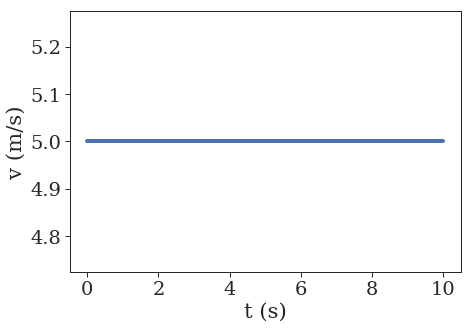

In [5]:
#Define parameter values:
v0 = 5
t0 = 0
x0 = 10
tmax = 10.

#Define numerical function for velocity:
vF = np.vectorize(sp.lambdify(t,v(t)))

#Define list of points for time:
tpts = np.linspace(t0,tmax,100)
#Plot velocity:
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,vF(tpts),linewidth=4)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('v (m/s)')
plt.tight_layout()

#### Build animation for integration procedure

In [6]:
#Set up plot
#Define ranges for x-plot:
xmin,xmax = 0.8*x0,1.2*(x0+v0*(tmax-t0))
fig,vbox,vline,xline,title = setupFig(vF,x0,t0,tmax,xmin,xmax)
#Define time step:
dt = 1.0

anim = animation.FuncAnimation(fig, animate,
                               frames=int((tmax-t0)/dt), interval=600, 
                               blit=True, fargs=(vF,x0,t0,dt,vline,vbox,xline,title))
plt.close()
anim

### Exact solution (using calculus)

In [7]:
x = sp.integrate(v(t),t) + x0
#Trajectory with undefined parameters:
display(x)

5*t + 10

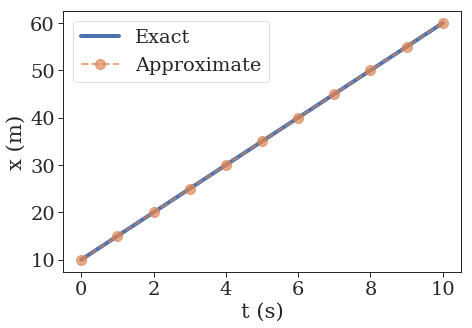

In [8]:
#Convert analytical function in numerical:
xF = sp.lambdify(t,x)

#Plot trajectory
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,xF(tpts),linewidth=4,label='Exact')
plt.plot(xline.get_xdata(),xline.get_ydata(),'o--',label='Approximate',markersize=10,linewidth=2,alpha=0.7)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('x (m)')
plt.legend()
plt.tight_layout()

## Contant acceleration (linear velocity):

In [9]:
a0,v0,x0,t0,t = sp.symbols('a_0,v_0,x_0,t_0,t')
#Define function (constant)
v = lambda t: v0 + a0*(t-t0)
v(t)

a_0*(t - t_0) + v_0

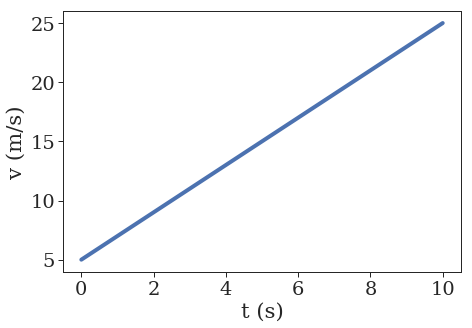

In [10]:
#Define parameter values:
a0 = 2
v0 = 5
t0 = 0
x0 = 10
tmax = 10.

#Define numerical function for velocity:
vF = np.vectorize(sp.lambdify(t,v(t)))

#Define list of points for time:
tpts = np.linspace(t0,tmax,100)
#Plot velocity:
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,vF(tpts),linewidth=4)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('v (m/s)')
plt.tight_layout()

#### Build animation for integration procedure

In [11]:
#Set up plot
xmin,xmax = 0.8*x0,1.2*(x0+v0*(tmax-t0)+a0*(tmax-t0)**2/2)
fig,vbox,vline,xline,title = setupFig(vF,x0,t0,tmax,xmin,xmax)
#Define time step:
dt = 1.0

anim = animation.FuncAnimation(fig, animate,
                               frames=int((tmax-t0)/dt), interval=600, 
                               blit=True, fargs=(vF,x0,t0,dt,vline,vbox,xline,title))
plt.close()
anim

### Exact solution (using calculus)

In [12]:
x = sp.integrate(v(t),t) + x0
#Trajectory with undefined parameters:
display(x)

t**2 + 5*t + 10

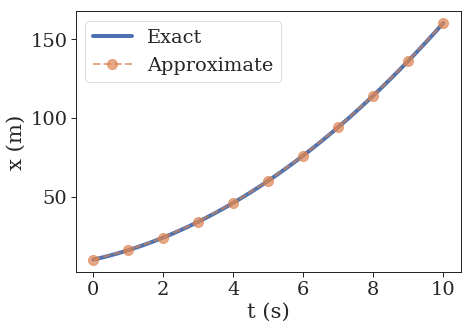

In [13]:
#Convert analytical function in numerical:
xF = sp.lambdify(t,x)

#Plot trajectory
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,xF(tpts),linewidth=4,label='Exact')
plt.plot(xline.get_xdata(),xline.get_ydata(),'o--',label='Approximate',markersize=10,linewidth=2,alpha=0.7)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('x (m)')
plt.legend()
plt.tight_layout()

## Linear acceleration:

In [14]:
da0,a0,v0,x0,t0,t = sp.symbols('da_0,a_0,v_0,x_0,t_0,t')
#Define function (constant)
v = lambda t: v0 + a0*(t-t0) + (da0/2)*(t-t0)**2
v(t)

a_0*(t - t_0) + da_0*(t - t_0)**2/2 + v_0

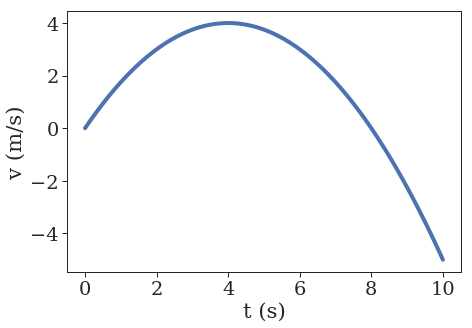

In [15]:
#Define parameter values:
da0 = -0.5
a0 = 2
v0 = 0
t0 = 0
x0 = 0
tmax = 10.

#Define numerical function for velocity:
vF = np.vectorize(sp.lambdify(t,v(t)))

#Define list of points for time:
tpts = np.linspace(t0,tmax,100)
#Plot velocity:
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,vF(tpts),linewidth=4)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('v (m/s)')
plt.tight_layout()

#### Build animation for integration procedure

In [16]:
#Set up plot
xmin,xmax = 0,30
fig,vbox,vline,xline,title = setupFig(vF,x0,t0,tmax,xmin,xmax)
#Define time step:
dt = 1.0

anim = animation.FuncAnimation(fig, animate,
                               frames=int((tmax-t0)/dt), interval=600, 
                               blit=True, fargs=(vF,x0,t0,dt,vline,vbox,xline,title))
plt.close()
anim

### Exact solution (using calculus)

In [17]:
x = sp.integrate(v(t),t) + x0
#Trajectory with undefined parameters:
display(x)

-0.0833333333333333*t**3 + 1.0*t**2

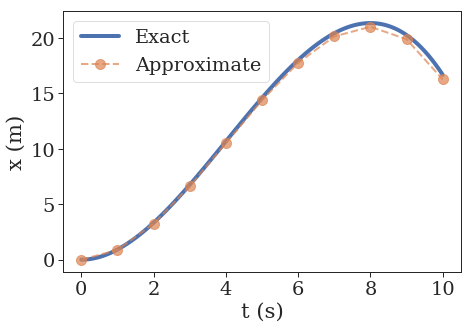

In [18]:
#Convert analytical function in numerical:
xF = sp.lambdify(t,x)

#Plot trajectory
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,xF(tpts),linewidth=4,label='Exact')
plt.plot(xline.get_xdata(),xline.get_ydata(),'o--',label='Approximate',markersize=10,linewidth=2,alpha=0.7)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('x (m)')
plt.legend()
plt.tight_layout()